<h2>Predicting Airline On-Time Performance using Turi's GraphLab Create</h2>

Here, we used the work done by Prof Larson discussed in the Split_Apply_Combine in R and Python.ipynb.  

There are two data sets created

- one hot encoded data set - airline_encoded_data SFrame </li>
- non encoded data set - airline_sf SFrame </li>




In [1]:
import graphlab
import graphlab as gl

## Get an airline_encoded_data SFRAME for all of the alirline data from 1988 to 2008

#### Note: It takes about 4 min and 30 seconds to execute the code below.

In [2]:
%time airline_encoded_data = gl.SFrame('data/'+ 'AirlineDataAll.csv')
airline_encoded_data.shape

This non-commercial license of GraphLab Create for academic use is assigned to bbrock@smu.edu and will expire on August 02, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\BENBRO~1\AppData\Local\Temp\graphlab_server_1502419640.log.0


Finished parsing file G:\Geek Squad Data Back Up\Documents\GitHub\tutorials\notebooks\data\AirlineDataAll.csv

Parsing completed. Parsed 100 lines in 1.03196 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,long,long,long,long,long,long,long,long,long,long,long,str,long,long,long,long,long,str,str,long,long,long,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 535527 lines. Lines per second: 287094

Read 3231890 lines. Lines per second: 437137

Read 5926155 lines. Lines per second: 456729

Read 8617751 lines. Lines per second: 466410

Read 11305731 lines. Lines per second: 473206

Read 13999232 lines. Lines per second: 473165

Read 16681635 lines. Lines per second: 473708

Read 19373692 lines. Lines per second: 473493

Read 22055262 lines. Lines per second: 474499

Read 24749174 lines. Lines per second: 476231

Read 27427697 lines. Lines per second: 476690

Read 30119475 lines. Lines per second: 478549

Read 32796715 lines. Lines per second: 479995

Read 35485936 lines. Lines per second: 480779

Read 38167980 lines. Lines per second: 482131

Read 40876846 lines. Lines per second: 483538

Read 43575636 lines. Lines per second: 484752

Read 46279310 lines. Lines per second: 485477

Read 48971539 lines. Lines per second: 486452

Read 51672909 lines. Lines per second: 486958

Read 54363732 lines. Lines per second: 487622

Read 57062236 lines. Lines per second: 488463

Read 59746767 lines. Lines per second: 489119

Read 62445564 lines. Lines per second: 490038

Read 65129168 lines. Lines per second: 490556

Read 67820046 lines. Lines per second: 491014

Read 70496178 lines. Lines per second: 491631

Read 73187782 lines. Lines per second: 492001

Read 75865960 lines. Lines per second: 492557

Read 78548242 lines. Lines per second: 492464

Read 81214128 lines. Lines per second: 492731

Read 83899499 lines. Lines per second: 491914

Read 86156538 lines. Lines per second: 490213

Read 88395912 lines. Lines per second: 488829

Read 91211027 lines. Lines per second: 487882

Read 93463564 lines. Lines per second: 486678

Read 95704158 lines. Lines per second: 485569

Read 98522588 lines. Lines per second: 484690

Read 100768481 lines. Lines per second: 483618

Read 103007149 lines. Lines per second: 482894

Read 105259984 lines. Lines per second: 481900

Read 107507415 lines. Lines per second: 481012

Read 110301363 lines. Lines per second: 480367

Read 112552384 lines. Lines per second: 479586

Read 115354955 lines. Lines per second: 478647

Read 118088023 lines. Lines per second: 478561

Read 120783286 lines. Lines per second: 478961

Read 123457687 lines. Lines per second: 479836

Finished parsing file G:\Geek Squad Data Back Up\Documents\GitHub\tutorials\notebooks\data\AirlineDataAll.csv

Parsing completed. Parsed 123534969 lines in 257.481 secs.

Wall time: 4min 51s


(123534969, 29)

In [3]:
airline_encoded_data.shape

(123534969, 29)

In [4]:
%time airline_encoded_data.head()

Wall time: 398 ms


Columns:
	Year	int
	Month	int
	DayofMonth	int
	DayOfWeek	int
	DepTime	int
	CRSDepTime	int
	ArrTime	int
	CRSArrTime	int
	UniqueCarrier	int
	FlightNum	int
	TailNum	int
	ActualElapsedTime	int
	CRSElapsedTime	int
	AirTime	str
	ArrDelay	int
	DepDelay	int
	Origin	int
	Dest	int
	Distance	int
	TaxiIn	str
	TaxiOut	str
	Cancelled	int
	CancellationCode	int
	Diverted	int
	CarrierDelay	str
	WeatherDelay	str
	NASDelay	str
	SecurityDelay	str
	LateAircraftDelay	str

Rows: 10

Data:
+------+-------+------------+-----------+---------+------------+---------+------------+
| Year | Month | DayofMonth | DayOfWeek | DepTime | CRSDepTime | ArrTime | CRSArrTime |
+------+-------+------------+-----------+---------+------------+---------+------------+
| 1987 |   10  |     14     |     3     |   741   |    730     |   912   |    849     |
| 1987 |   10  |     15     |     4     |   729   |    730     |   903   |    849     |
| 1987 |   10  |     17     |     6     |   741   |    730     |   918   |    849     |
| 1987 |   10  |     18     |     7     |   729   |    730     |   847   |    849     |
| 1987 |   10  |     19     |     1     |   749   |    730     |   922   |    849     |
| 1987 |   10  |     21     |     3     |   728   |    730     |   848   |    849     |
| 1987 |   10  |     22     |     4     |   728   |    730     |   852   |    849     |
| 1987 |   10  |     23     |     5     |   731   |    730     |   902   |    849     |
| 1987 |   10  |     24     |     6     |   744   |    730     |   908   |    849     |
| 1987 |   10  |     25     |     7     |   729   |    730     |   851   |    849     |
+------+-------+------------+-----------+---------+------------+---------+------------+
+---------------+-----------+---------+-------------------+----------------+
| UniqueCarrier | FlightNum | TailNum | ActualElapsedTime | CRSElapsedTime |
+---------------+-----------+---------+-------------------+----------------+
|       7       |    1451   |   9722  |         91        |       79       |
|       7       |    1451   |   9722  |         94        |       79       |
|       7       |    1451   |   9722  |         97        |       79       |
|       7       |    1451   |   9722  |         78        |       79       |
|       7       |    1451   |   9722  |         93        |       79       |
|       7       |    1451   |   9722  |         80        |       79       |
|       7       |    1451   |   9722  |         84        |       79       |
|       7       |    1451   |   9722  |         91        |       79       |
|       7       |    1451   |   9722  |         84        |       79       |
|       7       |    1451   |   9722  |         82        |       79       |
+---------------+-----------+---------+-------------------+----------------+
+---------+----------+----------+--------+------+----------+--------+-----+
| AirTime | ArrDelay | DepDelay | Origin | Dest | Distance | TaxiIn | ... |
+---------+----------+----------+--------+------+----------+--------+-----+
|   None  |    23    |    11    |  172   | 202  |   447    |  None  | ... |
|   None  |    14    |    -1    |  172   | 202  |   447    |  None  | ... |
|   None  |    29    |    11    |  172   | 202  |   447    |  None  | ... |
|   None  |    -2    |    -1    |  172   | 202  |   447    |  None  | ... |
|   None  |    33    |    19    |  172   | 202  |   447    |  None  | ... |
|   None  |    -1    |    -2    |  172   | 202  |   447    |  None  | ... |
|   None  |    3     |    -2    |  172   | 202  |   447    |  None  | ... |
|   None  |    13    |    1     |  172   | 202  |   447    |  None  | ... |
|   None  |    19    |    14    |  172   | 202  |   447    |  None  | ... |
|   None  |    2     |    -1    |  172   | 202  |   447    |  None  | ... |
+---------+----------+----------+--------+------+----------+--------+-----+
[10 rows x 29 columns]

In [5]:
# CONVENIENCE BLOCK FOR THOSE LOADING FROM DISK HERE

# If you have already run the notebook above and just want to load up the data
# then you can reload the SFrame here
#
# time is 3.93 seconds to execute the statement below
#
%time  airline_sf = gl.load_sframe('Data/sframe_directory')

Wall time: 243 ms


In [6]:
%time airline_sf.shape

Wall time: 3 ms


(123534969, 29)

In [7]:
%time airline_sf.head()

Wall time: 487 ms


Columns:
	Year	int
	Month	int
	DayofMonth	int
	DayOfWeek	int
	DepTime	int
	CRSDepTime	int
	ArrTime	int
	CRSArrTime	int
	UniqueCarrier	str
	FlightNum	int
	TailNum	str
	ActualElapsedTime	int
	CRSElapsedTime	int
	AirTime	int
	ArrDelay	int
	DepDelay	int
	Origin	str
	Dest	str
	Distance	int
	TaxiIn	int
	TaxiOut	int
	Cancelled	int
	CancellationCode	str
	Diverted	int
	CarrierDelay	int
	WeatherDelay	int
	NASDelay	int
	SecurityDelay	int
	LateAircraftDelay	int

Rows: 10

Data:
+------+-------+------------+-----------+---------+------------+---------+------------+
| Year | Month | DayofMonth | DayOfWeek | DepTime | CRSDepTime | ArrTime | CRSArrTime |
+------+-------+------------+-----------+---------+------------+---------+------------+
| 1987 |   10  |     14     |     3     |   741   |    730     |   912   |    849     |
| 1987 |   10  |     15     |     4     |   729   |    730     |   903   |    849     |
| 1987 |   10  |     17     |     6     |   741   |    730     |   918   |    849     |
| 1987 |   10  |     18     |     7     |   729   |    730     |   847   |    849     |
| 1987 |   10  |     19     |     1     |   749   |    730     |   922   |    849     |
| 1987 |   10  |     21     |     3     |   728   |    730     |   848   |    849     |
| 1987 |   10  |     22     |     4     |   728   |    730     |   852   |    849     |
| 1987 |   10  |     23     |     5     |   731   |    730     |   902   |    849     |
| 1987 |   10  |     24     |     6     |   744   |    730     |   908   |    849     |
| 1987 |   10  |     25     |     7     |   729   |    730     |   851   |    849     |
+------+-------+------------+-----------+---------+------------+---------+------------+
+---------------+-----------+---------+-------------------+----------------+
| UniqueCarrier | FlightNum | TailNum | ActualElapsedTime | CRSElapsedTime |
+---------------+-----------+---------+-------------------+----------------+
|       PS      |    1451   |   None  |         91        |       79       |
|       PS      |    1451   |   None  |         94        |       79       |
|       PS      |    1451   |   None  |         97        |       79       |
|       PS      |    1451   |   None  |         78        |       79       |
|       PS      |    1451   |   None  |         93        |       79       |
|       PS      |    1451   |   None  |         80        |       79       |
|       PS      |    1451   |   None  |         84        |       79       |
|       PS      |    1451   |   None  |         91        |       79       |
|       PS      |    1451   |   None  |         84        |       79       |
|       PS      |    1451   |   None  |         82        |       79       |
+---------------+-----------+---------+-------------------+----------------+
+---------+----------+----------+--------+------+----------+--------+-----+
| AirTime | ArrDelay | DepDelay | Origin | Dest | Distance | TaxiIn | ... |
+---------+----------+----------+--------+------+----------+--------+-----+
|   None  |    23    |    11    |  SAN   | SFO  |   447    |  None  | ... |
|   None  |    14    |    -1    |  SAN   | SFO  |   447    |  None  | ... |
|   None  |    29    |    11    |  SAN   | SFO  |   447    |  None  | ... |
|   None  |    -2    |    -1    |  SAN   | SFO  |   447    |  None  | ... |
|   None  |    33    |    19    |  SAN   | SFO  |   447    |  None  | ... |
|   None  |    -1    |    -2    |  SAN   | SFO  |   447    |  None  | ... |
|   None  |    3     |    -2    |  SAN   | SFO  |   447    |  None  | ... |
|   None  |    13    |    1     |  SAN   | SFO  |   447    |  None  | ... |
|   None  |    19    |    14    |  SAN   | SFO  |   447    |  None  | ... |
|   None  |    2     |    -1    |  SAN   | SFO  |   447    |  None  | ... |
+---------+----------+----------+--------+------+----------+--------+-----+
[10 rows x 29 columns]

In [8]:
list_of_features = ['TaxiIn', 
                    'TaxiOut', 
                    'CarrierDelay', 
                    'WeatherDelay', 
                    'NASDelay', 
                    'SecurityDelay', 
                    'LateAircraftDelay',
                    'ActualElapsedTime']

In [9]:
airline_encoded_data = airline_encoded_data.dropna(list_of_features)

In [10]:
airline_encoded_data.shape

(33540215, 29)

In [11]:
airline_encoded_data.head()

Columns:
	Year	int
	Month	int
	DayofMonth	int
	DayOfWeek	int
	DepTime	int
	CRSDepTime	int
	ArrTime	int
	CRSArrTime	int
	UniqueCarrier	int
	FlightNum	int
	TailNum	int
	ActualElapsedTime	int
	CRSElapsedTime	int
	AirTime	str
	ArrDelay	int
	DepDelay	int
	Origin	int
	Dest	int
	Distance	int
	TaxiIn	str
	TaxiOut	str
	Cancelled	int
	CancellationCode	int
	Diverted	int
	CarrierDelay	str
	WeatherDelay	str
	NASDelay	str
	SecurityDelay	str
	LateAircraftDelay	str

Rows: 10

Data:
+------+-------+------------+-----------+---------+------------+---------+------------+
| Year | Month | DayofMonth | DayOfWeek | DepTime | CRSDepTime | ArrTime | CRSArrTime |
+------+-------+------------+-----------+---------+------------+---------+------------+
| 2003 |   6   |     29     |     7     |   1756  |    1725    |   1904  |    1838    |
| 2003 |   6   |     30     |     1     |   1721  |    1725    |   1827  |    1838    |
| 2003 |   6   |     1      |     7     |   736   |    740     |   1004  |    1001    |
| 2003 |   6   |     2      |     1     |   736   |    740     |   1015  |    1001    |
| 2003 |   6   |     3      |     2     |   737   |    740     |   956   |    1001    |
| 2003 |   6   |     4      |     3     |   739   |    740     |   957   |    1001    |
| 2003 |   6   |     5      |     4     |   734   |    740     |   948   |    1001    |
| 2003 |   6   |     6      |     5     |   739   |    740     |   949   |    1001    |
| 2003 |   6   |     7      |     6     |   730   |    740     |   940   |    1001    |
| 2003 |   6   |     8      |     7     |   733   |    740     |   938   |    1001    |
+------+-------+------------+-----------+---------+------------+---------+------------+
+---------------+-----------+---------+-------------------+----------------+---------+
| UniqueCarrier | FlightNum | TailNum | ActualElapsedTime | CRSElapsedTime | AirTime |
+---------------+-----------+---------+-------------------+----------------+---------+
|       28      |    781    |  13444  |        128        |      133       |   103   |
|       28      |    781    |   6483  |        126        |      133       |   110   |
|       28      |    782    |   259   |        148        |      141       |   126   |
|       28      |    782    |   7997  |        159        |      141       |   133   |
|       28      |    782    |   4922  |        139        |      141       |   120   |
|       28      |    782    |   5012  |        138        |      141       |   116   |
|       28      |    782    |  10881  |        134        |      141       |   115   |
|       28      |    782    |   5493  |        130        |      141       |   115   |
|       28      |    782    |   7295  |        130        |      141       |   113   |
|       28      |    782    |  11413  |        125        |      141       |   115   |
+---------------+-----------+---------+-------------------+----------------+---------+
+----------+----------+--------+------+----------+--------+-----+
| ArrDelay | DepDelay | Origin | Dest | Distance | TaxiIn | ... |
+----------+----------+--------+------+----------+--------+-----+
|    26    |    31    |  207   |  33  |   862    |   8    | ... |
|   -11    |    -4    |  207   |  33  |   862    |   4    | ... |
|    3     |    -4    |   20   | 114  |   925    |   7    | ... |
|    14    |    -4    |   20   | 114  |   925    |   9    | ... |
|    -5    |    -3    |   20   | 114  |   925    |   7    | ... |
|    -4    |    -1    |   20   | 114  |   925    |   7    | ... |
|   -13    |    -6    |   20   | 114  |   925    |   4    | ... |
|   -12    |    -1    |   20   | 114  |   925    |   5    | ... |
|   -21    |   -10    |   20   | 114  |   925    |   6    | ... |
|   -23    |    -7    |   20   | 114  |   925    |   2    | ... |
+----------+----------+--------+------+----------+--------+-----+
[10 rows x 29 columns]

# GraphLab Create plot Working!!

##  Data Analysis using Turi's Graphlab Create plots working.  The graphics are fantantistic but not as flexible as matplotlib.

In [12]:
graphlab.canvas.set_target('ipynb')
airline_encoded_data.show()

In [13]:
gl.canvas.set_target('ipynb')
airline_encoded_data["UniqueCarrier"].show(view = "Categorical")

In [14]:
gl.canvas.set_target('ipynb')
airline_encoded_data["UniqueCarrier"].show(view = "Categorical")

In [15]:
gl.canvas.set_target('ipynb')
airline_sf["UniqueCarrier"].show(view = "Categorical")

In [16]:
graphlab.canvas.set_target('ipynb')
airline_encoded_data.show()

In [17]:
gl.canvas.set_target('ipynb')
airline_encoded_data.show(view = "Bar Chart", x="FlightNum", y="Year")

In [18]:
graphlab.canvas.set_target('ipynb')
airline_sf.show()

In [21]:
from IPython.display import display
from IPython.display import Image

import matplotlib.pyplot as plt # module for plotting
import seaborn as sns
import sklearn as sklearn
from sklearn import linear_model, cross_validation, metrics, svm, ensemble
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.cross_validation  import train_test_split, cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import sem
import statsmodels.api as sm
import itertools

#############################
### Matplotlib
import matplotlib.pyplot as plt # module for plotting 
from matplotlib import interactive, font_manager
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.colors import ListedColormap

dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

cmap_set1 = ListedColormap(['#4daf4a', '#377eb8', '#e41a1c' ])
dark2_cmap=ListedColormap(dark2_colors)

%matplotlib inline

# 4.3  Analyzing Popular Airport Destination Airport



In [52]:
%time sf_popular_airport_dest_counts = airline_sf.groupby('Dest', {'num_flights':gl.aggregate.COUNT()}).topk('num_flights',10)
sf_popular_airport_dest_counts

Wall time: 1min 13s


Columns:
	Dest	str
	num_flights	int

Rows: 10

Data:
+------+-------------+
| Dest | num_flights |
+------+-------------+
| ORD  |   4609695   |
| ATL  |   4430402   |
| DFW  |   3954678   |
| LAX  |   2919668   |
| PHX  |   2520604   |
| DEN  |   2251009   |
| IAH  |   2208029   |
| DTW  |   2095631   |
| LAS  |   2010117   |
| MSP  |   1967389   |
+------+-------------+
[10 rows x 2 columns]

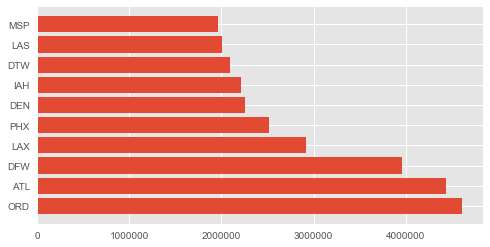

In [26]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('ggplot')

# As seen above, the sf_counts SFrame has the origin of the flight on the left
# and the count of flights on the right 

# let's grab the top 10 entries
sf_top = sf_popular_airport_dest_counts.topk('num_flights',10) # this is builtin command in graphlab

airports = np.array(sf_top['Dest'])
counts = np.array(sf_top['num_flights'])

fig = plt.figure(figsize=(8,4))
plt.barh(range(len(counts)),counts)

# and set them on the plot
plt.yticks(range(len(airports)), airports)

plt.show()

In [45]:
%time sf_popular_airport_dow_counts = airline_sf.groupby('DayOfWeek', {'num_flights':gl.aggregate.COUNT()}).topk('num_flights',10)
sf_popular_airport_dow_counts

Wall time: 32.2 s


Columns:
	DayOfWeek	int
	num_flights	int

Rows: 7

Data:
+-----------+-------------+
| DayOfWeek | num_flights |
+-----------+-------------+
|     1     |   12663203  |
|     5     |   12644085  |
|     4     |   12632733  |
|     3     |   12625207  |
|     2     |   12578325  |
|     7     |   11996460  |
|     6     |   10997661  |
+-----------+-------------+
[7 rows x 2 columns]

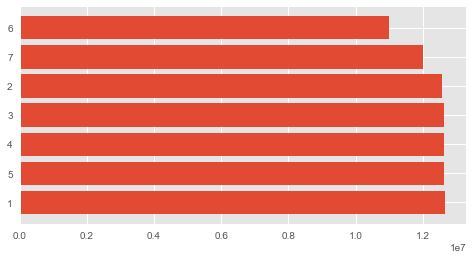

In [43]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('ggplot')

# As seen above, the sf_counts SFrame has the origin of the flight on the left
# and the count of flights on the right 

# let's grab the top 10 entries
sf_top = sf_popular_airport_dow_counts.sort('DayOfWeek').topk('num_flights',10) # this is builtin command in graphlab

airports = np.array(sf_top['DayOfWeek'])
counts = np.array(sf_top['num_flights'])

fig = plt.figure(figsize=(8,4))
plt.barh(range(len(counts)),counts)

# and set them on the plot
plt.yticks(range(len(airports)), airports)

plt.show()

In [46]:
%time sf_popular_airport_dom_counts = airline_sf.groupby('DayofMonth', {'num_flights':gl.aggregate.COUNT()}).topk('num_flights',10)
sf_popular_airport_dom_counts

Wall time: 32.3 s


Columns:
	DayofMonth	int
	num_flights	int

Rows: 10

Data:
+------------+-------------+
| DayofMonth | num_flights |
+------------+-------------+
|     21     |   2851136   |
|     19     |   2847294   |
|     20     |   2846952   |
|     17     |   2846349   |
|     16     |   2845601   |
|     14     |   2845058   |
|     18     |   2844692   |
|     7      |   2844120   |
|     12     |   2842101   |
|     9      |   2838752   |
+------------+-------------+
[10 rows x 2 columns]

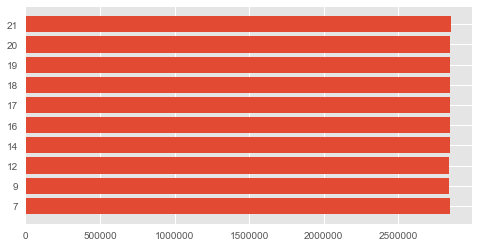

In [47]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('ggplot')

# As seen above, the sf_counts SFrame has the origin of the flight on the left
# and the count of flights on the right 

# let's grab the top 10 entries
sf_top = sf_popular_airport_dom_counts.sort('DayofMonth')    #topk('num_flights',10) # this is builtin command in graphlab

airports = np.array(sf_top['DayofMonth'])
counts = np.array(sf_top['num_flights'])

fig = plt.figure(figsize=(8,4))
plt.barh(range(len(counts)),counts)

# and set them on the plot
plt.yticks(range(len(airports)), airports)

plt.show()

In [48]:
%time sf_popular_airport_month_counts = airline_sf.groupby('Month', {'num_flights':gl.aggregate.COUNT()}).topk('num_flights',10)
sf_popular_airport_month_counts

Wall time: 31.3 s


Columns:
	Month	int
	num_flights	int

Rows: 10

Data:
+-------+-------------+
| Month | num_flights |
+-------+-------------+
|   8   |   7528021   |
|   7   |   7484756   |
|   3   |   7381050   |
|   5   |   7301646   |
|   6   |   7237564   |
|   1   |   7234844   |
|   10  |   7225904   |
|   4   |   7124717   |
|   12  |   7091506   |
|   9   |   7002992   |
+-------+-------------+
[10 rows x 2 columns]

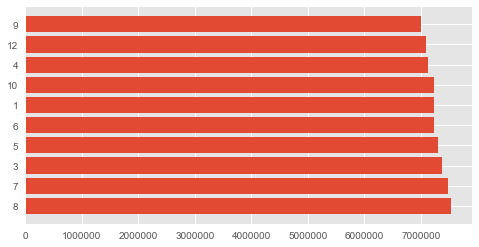

In [50]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('ggplot')

# As seen above, the sf_counts SFrame has the origin of the flight on the left
# and the count of flights on the right 

# let's grab the top 10 entries
sf_top = sf_popular_airport_month_counts.sort('Month').topk('num_flights',10) # this is builtin command in graphlab

airports = np.array(sf_top['Month'])
counts = np.array(sf_top['num_flights'])

fig = plt.figure(figsize=(8,4))
plt.barh(range(len(counts)),counts)

# and set them on the plot
plt.yticks(range(len(airports)), airports)

plt.show()

Wall time: 0 ns
Wall time: 0 ns


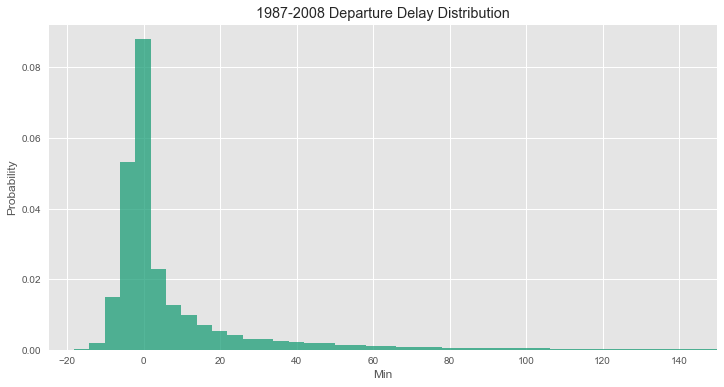

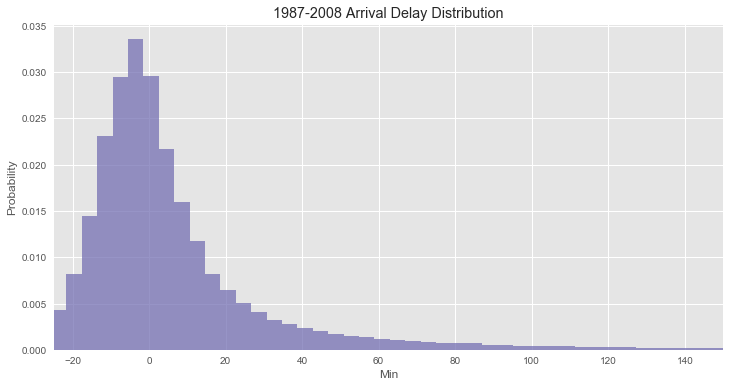

In [51]:
# plt arrival delay distribution
%time plt.figure(figsize=(12, 6))
plt.hist(airline_sf['DepDelay'].dropna(),bins = 1000,normed=1, alpha=0.75, color=dark2_colors[0])
plt.xlim(-25,150)
plt.xlabel('Min')
plt.ylabel('Probability')
plt.title('1987-2008 Departure Delay Distribution')


# plt arrival delay distribution
%time plt.figure(figsize=(12, 6))
plt.hist(airline_sf['ArrDelay'].dropna(),bins = 1000,normed=1, alpha=0.75, color=dark2_colors[2])
plt.xlim(-25,150)
plt.xlabel('Min')
plt.ylabel('Probability')
plt.title('1987-2008 Arrival Delay Distribution')

In [19]:
#Airline Delay by carrier
gl.canvas.set_target('ipynb')

airline_sf['UniqueCarrier','ArrDelay'].groupby(['UniqueCarrier'], 
                                                      operations={'mean_rating': gl.aggregate.MEAN('ArrDelay')}).show(view='Bar Chart', x='UniqueCarrier', y= 'ArrDelay')


airline_sf['UniqueCarrier','DepDelay'].groupby(['UniqueCarrier'], 
                                       operations={'mean_rating': gl.aggregate.MEAN('DepDelay')}).show(view='Bar Chart', x='UniqueCarrier', y= 'DepDelay')



In [55]:
import graphlab.aggregate as agg
arrival_delay_count = airline_sf['UniqueCarrier','ArrDelay'].groupby(['UniqueCarrier'],
                                                     operations={'Arrival Delay': agg.MEAN('ArrDelay')}).topk('Arrival Delay',10)
arrival_delay_count

Columns:
	UniqueCarrier	str
	Arrival Delay	float

Rows: 10

Data:
+---------------+---------------+
| UniqueCarrier | Arrival Delay |
+---------------+---------------+
|       YV      | 11.4432025198 |
|       EV      | 10.7421398061 |
|       B6      | 9.66572354236 |
|       FL      | 9.48246080255 |
|       UA      | 9.28405364713 |
|       AS      | 9.15559110699 |
|       HP      | 9.10271217907 |
|       XE      | 9.04443777912 |
|       MQ      | 8.55774247708 |
|       TW      | 7.65701988382 |
+---------------+---------------+
[10 rows x 2 columns]

In [56]:
import graphlab.aggregate as agg
departure_delay_count = airline_sf['UniqueCarrier','DepDelay'].groupby(['UniqueCarrier'],
                                                     operations={'Departure Delay': agg.MEAN('DepDelay')}).topk('Departure Delay',10)
departure_delay_count

Columns:
	UniqueCarrier	str
	Departure Delay	float

Rows: 10

Data:
+---------------+-----------------+
| UniqueCarrier | Departure Delay |
+---------------+-----------------+
|       EV      |  13.4848488894  |
|       YV      |  12.9055260285  |
|       B6      |  11.2464628997  |
|       UA      |  10.7278633077  |
|       FL      |  10.2718548914  |
|       WN      |  9.63724739155  |
|       DH      |  9.61263938969  |
|       AS      |  9.46188934647  |
|       HP      |  9.43846047959  |
|       OH      |  9.30687513589  |
+---------------+-----------------+
[10 rows x 2 columns]

In [58]:
import graphlab.aggregate as agg
destination__departure_delay_avg = airline_sf['Dest','DepDelay'].groupby(['Dest'],
                                                     operations={'Departure Delay': agg.MEAN('DepDelay')}).topk('Departure Delay',10)
destination__departure_delay_avg

Columns:
	Dest	str
	Departure Delay	float

Rows: 10

Data:
+------+-----------------+
| Dest | Departure Delay |
+------+-----------------+
| CYS  |       27.3      |
| MQT  |  25.8883653498  |
| SOP  |  22.5980707395  |
| HHH  |   22.566951567  |
| ILG  |  22.0117035111  |
| OTH  |  21.5728542914  |
| FMN  |       19.2      |
| PIR  |  18.8888888889  |
| MCN  |  18.6680899516  |
| ACK  |  18.3281829419  |
+------+-----------------+
[10 rows x 2 columns]

In [39]:
import graphlab.aggregate as agg
origin__departure_delay_avg = airline_sf['Origin','DepDelay'].groupby(['Origin'],
                                                     operations={'Origin Delay': agg.MEAN('DepDelay')}).topk('Origin Delay',10)
origin__departure_delay_avg

Columns:
	Origin	str
	Origin Delay	float

Rows: 10

Data:
+--------+---------------+
| Origin |  Origin Delay |
+--------+---------------+
|  FMN   | 203.666666667 |
|  CYS   |     145.0     |
|  OGD   | 143.666666667 |
|  BFF   |     131.0     |
|  PUB   |      65.5     |
|  PIR   | 32.8888888889 |
|  ACK   | 27.6878504673 |
|  CKB   |     25.625    |
|  SOP   | 25.2410423453 |
|  ADK   | 22.7319778189 |
+--------+---------------+
[10 rows x 2 columns]

In [61]:
# topk('value',reverse=True)
import graphlab.aggregate as agg
origin__departure_delay_avg = airline_sf['Origin','DepDelay'].groupby(['Origin'],
                                                     operations={'Origin Delay': agg.MEAN('DepDelay')}).topk('Origin Delay',reverse=True)
origin__departure_delay_avg

Columns:
	Origin	str
	Origin Delay	float

Rows: 10

Data:
+--------+-----------------+
| Origin |   Origin Delay  |
+--------+-----------------+
|  MIB   |  -7.13636363636 |
|  SPN   |  -6.14864864865 |
|  GLH   |       -5.5      |
|  LNY   |  -4.50362318841 |
|  MKK   |  -2.96629213483 |
|  EFD   |  -2.04395176974 |
|  ITO   |  -1.63028467938 |
|  RDR   |  -1.32608695652 |
|  WYS   | -0.879472693032 |
|  IYK   |  -0.58419535357 |
+--------+-----------------+
[10 rows x 2 columns]

In [62]:
import graphlab.aggregate as agg
origin__arrival_delay_avg = airline_sf['Origin','ArrDelay'].groupby(['Origin'],
                                                     operations={'Arrival Delay': agg.MEAN('ArrDelay')}).topk('Arrival Delay',reverse=True)
origin__arrival_delay_avg

Columns:
	Origin	str
	Arrival Delay	float

Rows: 10

Data:
+--------+----------------+
| Origin | Arrival Delay  |
+--------+----------------+
|  MIB   | -14.2613636364 |
|  SPN   | -11.1621621622 |
|  MKK   | -8.37453183521 |
|  SLE   | -5.92132269099 |
|  LNY   | -4.94007490637 |
|  BLI   | -3.83912248629 |
|  WYS   | -3.64213836478 |
|  RDR   | -3.45652173913 |
|  VIS   | -3.13015184382 |
|  IYK   | -2.82017320428 |
+--------+----------------+
[10 rows x 2 columns]

# Create New Feature 'IS_DELAYED'

##  I tried to create the following:
#
# airline_encoded_data['is_delayed'] = 
# airline_encoded_data['DepDelay'] > 15 or airline_encoded_data['ArrDelay'] > 15 

In [22]:
aircraft_data_delayed = airline_encoded_data[airline_encoded_data['ArrDelay'] > 15] or airline_encoded_data[airline_encoded_data['DepDelay'] > 15]

In [20]:
airline_encoded_data['is_delayed'] = airline_encoded_data['ArrDelay'] > 15

In [23]:
airline_encoded_data['is_delayed'] = airline_encoded_data['DepDelay'] > 15

In [ ]:
import numpy as np
airline_encoded_data['is_delayed'] = airline_encoded_data(np.logical_and(airline_encoded_data['DepDelay'] > 15, airline_encoded_data['ArrDelay'] > 15)) 

We split the data into training and test subsets. 

In [23]:
# split the data randomly, keeping 80% for training and the rest for validation
(train, test) = airline_encoded_data.random_split(0.8)

## Baseline approach: Linear Regression Modeling

## Select the custom_airline_features

In [21]:
custom_airline_features = ['Month',
                           'DayofMonth', 
                           'DayOfWeek', 
                           'DepTime', 
                           'CRSDepTime', 
                           'ArrTime', 
                           'CRSArrTime', 
                           'UniqueCarrier', 
                           'FlightNum', 
                           'TailNum']

In [71]:
%time model = graphlab.linear_regression.create(train, target = 'is_delayed', features = custom_airline_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 25491633

Number of features          : 10

Number of unpacked features : 10

Number of coefficients    : 11

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 5.857644     | 2.528101           | 2.522954             | 0.380843      | 0.381417        |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

Wall time: 2min 18s


In [72]:
print model.get('coefficients').topk('value')

+---------------+-------+--------------------+-------------------+
|      name     | index |       value        |       stderr      |
+---------------+-------+--------------------+-------------------+
|   DayOfWeek   |  None |  0.00112888981078  | 3.78746451684e-05 |
|    DepTime    |  None | 0.000799119061006  | 6.29639266067e-07 |
|   DayofMonth  |  None | 0.000660258637362  | 8.57949481577e-06 |
| UniqueCarrier |  None | 0.000565958993793  | 8.02785513679e-06 |
|   CRSArrTime  |  None | 4.95917574517e-05  | 3.68145813696e-07 |
|   FlightNum   |  None | 2.88970167198e-06  | 4.02726510174e-08 |
|    TailNum    |  None | -1.9592011493e-08  | 1.93787402877e-08 |
|    ArrTime    |  None | -6.09670073353e-05 | 3.03444379758e-07 |
|   CRSDepTime  |  None | -0.000625952085893 | 6.40909534241e-07 |
|     Month     |  None | -0.00148475651716  | 2.22636269218e-05 |
+---------------+-------+--------------------+-------------------+
[10 rows x 4 columns]



In [73]:
print model.get('coefficients').topk('value',reverse=True)

+---------------+-------+--------------------+-------------------+
|      name     | index |       value        |       stderr      |
+---------------+-------+--------------------+-------------------+
|  (intercept)  |  None |  -0.0415920000331  | 0.000405282639296 |
|     Month     |  None | -0.00148475651716  | 2.22636269218e-05 |
|   CRSDepTime  |  None | -0.000625952085893 | 6.40909534241e-07 |
|    ArrTime    |  None | -6.09670073353e-05 | 3.03444379758e-07 |
|    TailNum    |  None | -1.9592011493e-08  | 1.93787402877e-08 |
|   FlightNum   |  None | 2.88970167198e-06  | 4.02726510174e-08 |
|   CRSArrTime  |  None | 4.95917574517e-05  | 3.68145813696e-07 |
| UniqueCarrier |  None | 0.000565958993793  | 8.02785513679e-06 |
|   DayofMonth  |  None | 0.000660258637362  | 8.57949481577e-06 |
|    DepTime    |  None | 0.000799119061006  | 6.29639266067e-07 |
+---------------+-------+--------------------+-------------------+
[10 rows x 4 columns]



In [74]:
# Number of feature columns
print "Number of features: %s"   % model['num_features']

Number of features: 10


In [75]:
# Number of coefficients in the model
print "Number of coefficients in the model : %s" % model['num_coefficients']

Number of coefficients in the model : 11


In [76]:
# Number of features (including expanded lists and dictionaries)
print "Number of unpacked features : %s " % model['num_unpacked_features']

Number of unpacked features : 10 


In [78]:
# Save predictions to an SArray
predictions = model.predict(test)

In [79]:
#Evaluatte the model and save the results into a dictionary
results = model.evaluate(test)

In [80]:
print results

{'max_error': 2.52661610587084, 'rmse': 0.38050752172443986}


##  Approach 2: Logistic Regression Modeling

In [81]:
%time model = graphlab.logistic_classifier.create(train, target = 'is_delayed', features = custom_airline_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 25491229

Number of classes           : 2

Number of feature columns   : 10

Number of unpacked features : 10

Number of coefficients    : 11

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 15.678346    | 0.809119          | 0.809121            |

| 2         | 3        | 26.353811    | 0.863133          | 0.862873            |

| 3         | 4        | 36.842288    | 0.891624          | 0.891522            |

| 4         | 5        | 48.379932    | 0.898516          | 0.898301            |

| 5         | 6        | 58.919184    | 0.898906          | 0.898698            |

| 6         | 7        | 69.388760    | 0.898908          | 0.898700            |

Wall time: 1min 41s


+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

## Evaluate the Logistic Regression Model

In [82]:
# Evaluate the model and save the results into a dictionary
print model.evaluate(test)

{'f1_score': 0.663910682314313, 'auc': 0.9567648088104059, 'recall': 0.49755493048156946, 'precision': 0.9973818012849726, 'log_loss': 0.339373096367494, 'roc_curve': Columns:
	threshold	float
	fpr	float
	tpr	float
	p	int
	n	int

Rows: 100001

Data:
+-----------+----------------+----------------+---------+---------+
| threshold |      fpr       |      tpr       |    p    |    n    |
+-----------+----------------+----------------+---------+---------+
|    0.0    |      1.0       |      1.0       | 1345974 | 5359888 |
|   1e-05   | 0.999642902986 | 0.988830393455 | 1345974 | 5359888 |
|   2e-05   | 0.999642902986 | 0.988827421629 | 1345974 | 5359888 |
|   3e-05   | 0.999642902986 | 0.98882519276  | 1345974 | 5359888 |
|   4e-05   | 0.999642902986 | 0.988822963891 | 1345974 | 5359888 |
|   5e-05   | 0.999642902986 | 0.988822963891 | 1345974 | 5359888 |
|   6e-05   | 0.999642902986 | 0.988819992065 | 1345974 | 5359888 |
|   7e-05   | 0.999642716415 | 0.988817763196 | 1345974 | 5359888 |
| 

In [83]:
model.get('coefficients')   # get the weights

Columns:
	name	str
	index	str
	class	int
	value	float
	stderr	float

Rows: 11

Data:
+---------------+-------+-------+--------------------+-------------------+
|      name     | index | class |       value        |       stderr      |
+---------------+-------+-------+--------------------+-------------------+
|  (intercept)  |  None |   1   |   -3.20339550318   |  0.00326865759365 |
|     Month     |  None |   1   | -0.00767687949441  | 0.000170328694882 |
|   DayofMonth  |  None |   1   |  0.00330861640912  | 6.60649583003e-05 |
|   DayOfWeek   |  None |   1   |  0.00643665379704  | 0.000290866980591 |
|    DepTime    |  None |   1   |  0.0246941668579   | 1.44759873417e-05 |
|   CRSDepTime  |  None |   1   |  -0.0239628520927  | 1.46165924854e-05 |
|    ArrTime    |  None |   1   | -1.49558418681e-06 | 2.38279893282e-06 |
|   CRSArrTime  |  None |   1   | 0.000106316680141  | 2.79159740634e-06 |
| UniqueCarrier |  None |   1   |  0.00307879915123  | 6.16274451957e-05 |
|   FlightNum   |  None |   1   |  1.0072278144e-05  | 3.08077610523e-07 |
+---------------+-------+-------+--------------------+-------------------+
[11 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [84]:
# Save predictions (probability estimates) to an SArray
predictions = model.classify(test)
print predictions

+-------+----------------+
| class |  probability   |
+-------+----------------+
|   0   | 0.844730608912 |
|   0   | 0.928220771797 |
|   0   | 0.927374259688 |
|   0   | 0.927672774909 |
|   0   | 0.963834207836 |
|   0   | 0.960816172997 |
|   0   | 0.894976931714 |
|   0   | 0.903081132374 |
|   0   | 0.90741645003  |
|   0   | 0.902842377616 |
+-------+----------------+
[6705862 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


# GraphLab Create's Logistic Regression model can return predictions for any of these types:

In [85]:
class_predictions = model.predict(test, output_type = "class")  # Class

# Evaluating Results

We can also evaluate our predictions by comparing them to known ratings. The results are evaluated using two metrics:

* Classification Accuracy: Fraction of test set examples with correct class label predictions.
* Confusion Matrix: Cross- tabulation of predicted and actual class labels.

In [86]:
result = model.evaluate(test)
print "Accuracy         : %s " % result['accuracy']
print "Confusion Matrix : \n%s " % result['confusion_matrix']

Accuracy         : 0.89888906154 
Confusion Matrix : 
+--------------+-----------------+---------+
| target_label | predicted_label |  count  |
+--------------+-----------------+---------+
|      0       |        1        |   1758  |
|      1       |        1        |  669696 |
|      1       |        0        |  676278 |
|      0       |        0        | 5358130 |
+--------------+-----------------+---------+
[4 rows x 3 columns]
 


<h1>Non linear regression: Traditional Matrix Factorization</h1>

Our task is to predict if there is flight delay before the flight is delayed, which is affected by the airport load, weather, plane type, carrier and many other paramters.  Let us try regular matrix factoriation.  

In [87]:
# Warning, this could take some time to run!!!!
#   14 minutes and 22 seconds
# Train a matrix factorization model with default parameters
%time model = graphlab.recommender.factorization_recommender.create(train, user_id="FlightNum", item_id="Dest", target="is_delayed", side_data_factorization=False)

# check out the results of training and validation
print 'Training RMSE', model.get('training_rmse')
print 'Validation RMSE', graphlab.evaluation.rmse(test['is_delayed'], model.predict(test))

Recsys training: model = factorization_recommender

Preparing data set.

Data has 26834353 observations with 8109 users and 323 items.

Data prepared in: 208.773s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-008   |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-010   |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 3354294 / 26834353 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 1.72414           | Not Viable                               |

| 1       | 0.431034          | Not Viable                               |

| 2       | 0.107759          | Not Viable                               |

| 3       | 0.0269397         | Not Viable                               |

| 4       | 0.00673491        | 0.0418396                                |

| 5       | 0.00336746        | 0.0383567                                |

| 6       | 0.00168373        | 0.038702                                 |

| 7       | 0.000841864       | 0.040125                                 |

| 8       | 0.000420932       | 0.0399501                                |

+---------+-------------------+------------------------------------------+

| Final   | 0.00336746        | 0.0383567                                |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 2.331ms      | 0.160387          | 0.400483              |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 11.73s       | 0.0559272         | 0.236484              | 0.00336746  |

| 2       | 23.08s       | 0.0492428         | 0.221905              | 0.0020023   |

| 3       | 34.40s       | 0.0450217         | 0.212183              | 0.00147727  |

| 4       | 45.65s       | 0.041021          | 0.202536              | 0.00119058  |

| 5       | 56.69s       | 0.0402751         | 0.200686              | 0.0010071   |

| 6       | 1m 7s        | 0.0395518         | 0.198876              | 0.000878392 |

| 7       | 1m 19s       | 0.0391375         | 0.197832              | 0.000782489 |

| 8       | 1m 30s       | 0.038806          | 0.196992              | 0.000707921 |

| 9       | 1m 41s       | 0.0384953         | 0.196202              | 0.000648067 |

| 10      | 1m 53s       | 0.0382457         | 0.195565              | 0.000598828 |

| 11      | 2m 4s        | 0.0380436         | 0.195047              | 0.000557516 |

| 12      | 2m 15s       | 0.0378584         | 0.194572              | 0.000522295 |

| 13      | 2m 27s       | 0.0377574         | 0.194312              | 0.000491863 |

| 14      | 2m 38s       | 0.0376832         | 0.194121              | 0.000465271 |

| 15      | 2m 49s       | 0.0375096         | 0.193673              | 0.000441808 |

| 16      | 3m 1s        | 0.0374023         | 0.193396              | 0.000420932 |

| 17      | 3m 13s       | 0.0372997         | 0.193131              | 0.000402222 |

| 18      | 3m 25s       | 0.0372476         | 0.192996              | 0.000385343 |

| 19      | 3m 36s       | 0.0371423         | 0.192723              | 0.00037003  |

| 20      | 3m 48s       | 0.0371636         | 0.192778              | 0.000356065 |

| 21      | 3m 59s       | 0.0368586         | 0.191985              | 0.000288656 |

| 22      | 4m 10s       | 0.0366132         | 0.191345              | 0.000234407 |

| 23      | 4m 22s       | 0.0365134         | 0.191084              | 0.000190649 |

| 24      | 4m 33s       | 0.0364355         | 0.19088               | 0.000184659 |

| 25      | 4m 45s       | 0.0364395         | 0.190891              | 0.000179091 |

| 26      | 4m 56s       | 0.0363246         | 0.190589              | 0.000146232 |

| 27      | 5m 7s        | 0.0362403         | 0.190368              | 0.000119534 |

| 28      | 5m 18s       | 0.0361175         | 0.190045              |             |

| 29      | 5m 29s       | 0.0361422         | 0.19011               |             |

| 30      | 5m 41s       | 0.0360913         | 0.189976              |             |

| 31      | 5m 53s       | 0.0360255         | 0.189803              |             |

| 32      | 6m 4s        | 0.0359949         | 0.189722              |             |

| 33      | 6m 15s       | 0.0359809         | 0.189685              |             |

| 34      | 6m 27s       | 0.0359646         | 0.189642              |             |

| 35      | 6m 39s       | 0.0359828         | 0.18969               |             |

| 36      | 6m 51s       | 0.0359413         | 0.189581              |             |

| 37      | 7m 4s        | 0.0359401         | 0.189578              |             |

| 38      | 7m 16s       | 0.0359068         | 0.18949               |             |

| 39      | 7m 29s       | 0.0359021         | 0.189478              | 2.6972e-005 |

| 40      | 7m 43s       | 0.0359198         | 0.189524              |             |

| 41      | 7m 55s       | 0.035907          | 0.18949               |             |

| 42      | 8m 8s        | 0.0358948         | 0.189458              | 1.8041e-005 |

| 43      | 8m 21s       | 0.0358741         | 0.189404              |             |

| 44      | 8m 32s       | 0.0358858         | 0.189434              |             |

| 45      | 8m 45s       | 0.0358887         | 0.189442              |             |

| 46      | 8m 56s       | 0.0358634         | 0.189375              |             |

| 47      | 9m 8s        | 0.0358841         | 0.18943               |             |

| 48      | 9m 19s       | 0.0358863         | 0.189436              |             |

| 49      | 9m 31s       | 0.0358851         | 0.189433              |             |

| 50      | 9m 42s       | 0.0358868         | 0.189437              |             |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Convergence on objective within bounds.

Computing final objective value and training RMSE.

Final objective value: 0.0359567

Final training RMSE: 0.189621

Wall time: 14min 22s
Training RMSE 0.189621495987
Validation RMSE 0.19030777841


# Let's remove the potential bootlenecks which could cause delays

In [24]:
train.remove_columns(['AirTime','ArrDelay','DepDelay','ArrTime'])
test.remove_columns(['AirTime','ArrDelay','DepDelay','ArrTime'])

Columns:
	Year	int
	Month	int
	DayofMonth	int
	DayOfWeek	int
	DepTime	int
	CRSDepTime	int
	CRSArrTime	int
	UniqueCarrier	int
	FlightNum	int
	TailNum	int
	ActualElapsedTime	int
	CRSElapsedTime	int
	Origin	int
	Dest	int
	Distance	int
	TaxiIn	str
	TaxiOut	str
	Cancelled	int
	CancellationCode	int
	Diverted	int
	CarrierDelay	str
	WeatherDelay	str
	NASDelay	str
	SecurityDelay	str
	LateAircraftDelay	str
	is_delayed	int

Rows: Unknown

Data:
+------+-------+------------+-----------+---------+------------+------------+---------------+
| Year | Month | DayofMonth | DayOfWeek | DepTime | CRSDepTime | CRSArrTime | UniqueCarrier |
+------+-------+------------+-----------+---------+------------+------------+---------------+
| 2003 |   6   |     29     |     7     |   1756  |    1725    |    1838    |       28      |
| 2003 |   6   |     1      |     7     |   736   |    740     |    1001    |       28      |
| 2003 |   6   |     2      |     1     |   736   |    740     |    1001    |       28      |
| 2003 |   6   |     5      |     4     |   734   |    740     |    1001    |       28      |
| 2003 |   6   |     7      |     6     |   730   |    740     |    1001    |       28      |
| 2003 |   6   |     9      |     1     |   737   |    740     |    1001    |       28      |
| 2003 |   6   |     11     |     3     |   736   |    740     |    1001    |       28      |
| 2003 |   6   |     4      |     3     |   1054  |    1100    |    1346    |       28      |
| 2003 |   6   |     13     |     5     |   1056  |    1055    |    1343    |       28      |
| 2003 |   6   |     17     |     2     |   1052  |    1055    |    1343    |       28      |
+------+-------+------------+-----------+---------+------------+------------+---------------+
+-----------+---------+-------------------+----------------+--------+------+----------+
| FlightNum | TailNum | ActualElapsedTime | CRSElapsedTime | Origin | Dest | Distance |
+-----------+---------+-------------------+----------------+--------+------+----------+
|    781    |  13444  |        128        |      133       |  207   |  33  |   862    |
|    782    |   259   |        148        |      141       |   20   | 114  |   925    |
|    782    |   7997  |        159        |      141       |   20   | 114  |   925    |
|    782    |  10881  |        134        |      141       |   20   | 114  |   925    |
|    782    |   7295  |        130        |      141       |   20   | 114  |   925    |
|    782    |   435   |        132        |      141       |   20   | 114  |   925    |
|    782    |  12555  |        140        |      141       |   20   | 114  |   925    |
|    782    |  10986  |         97        |      106       |  112   |  15  |   622    |
|    782    |  10192  |        131        |      108       |  112   |  15  |   622    |
|    782    |   4464  |        122        |      108       |  112   |  15  |   622    |
+-----------+---------+-------------------+----------------+--------+------+----------+
+--------+---------+-----------+------------------+----------+-----+
| TaxiIn | TaxiOut | Cancelled | CancellationCode | Diverted | ... |
+--------+---------+-----------+------------------+----------+-----+
|   8    |    17   |     0     |        4         |    0     | ... |
|   7    |    15   |     0     |        4         |    0     | ... |
|   9    |    17   |     0     |        4         |    0     | ... |
|   4    |    15   |     0     |        4         |    0     | ... |
|   6    |    11   |     0     |        4         |    0     | ... |
|   4    |    9    |     0     |        4         |    0     | ... |
|   7    |    12   |     0     |        4         |    0     | ... |
|   3    |    12   |     0     |        4         |    0     | ... |
|   3    |    42   |     0     |        4         |    0     | ... |
|   4    |    27   |     0     |        4         |    0     | ... |
+--------+---------+-----------+------------------+----------+-----+
[? rows x 26 columns]
Note: Only the head of the

## Non Linear regression: Boosted decision trees

## Do exercise without removing the columns from the train and test data

In [26]:
# This could take some time to run  ==> It took me 4 hours, 45 minutes and 49 seconds to 
# execute this section of code on a Windows 10 64 Bit HP Envy.
#
# DO YOU REALLY WANT TO RE-EXECUTE THIS CODE
#
# Train a matrix factorization model with default parameters
%time model = graphlab.boosted_trees_regression.create(train, target="is_delayed", max_iterations=50)

# check out the results of training and validation
print 'Training RMSE', model.get('training_rmse')
print 'Validation RMSE', graphlab.evaluation.rmse(test['is_delayed'], model.predict(test))

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: Detected extremely low variance for feature(s) 'Cancelled', 'Diverted' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

External memory mode: 12 batches

Boosted trees regression:

--------------------------------------------------------

Number of examples          : 25489731

Number of features          : 29

Number of unpacked features : 29

Create disk column page 1/12

Create disk column page 2/12

Create disk column page 3/12

Create disk column page 4/12

Create disk column page 5/12

Create disk column page 6/12

Create disk column page 7/12

Create disk column page 8/12

Create disk column page 9/12

Create disk column page 10/12

Create disk column page 11/12

Create disk column page 12/12

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 544.172953   | 0.350001           | 0.350001             | 0.350000      | 0.350000        |

| 2         | 986.777862   | 0.245001           | 0.245001             | 0.245000      | 0.245000        |

| 3         | 1377.270101  | 0.171501           | 0.171501             | 0.171500      | 0.171500        |

| 4         | 1841.256218  | 0.120051           | 0.120051             | 0.120050      | 0.120050        |

| 5         | 2331.310660  | 0.084036           | 0.084036             | 0.084035      | 0.084035        |

| 6         | 2772.949614  | 0.058825           | 0.058825             | 0.058825      | 0.058825        |

| 7         | 3232.190999  | 0.041178           | 0.041178             | 0.041177      | 0.041177        |

| 8         | 3815.548178  | 0.028825           | 0.028825             | 0.028824      | 0.028824        |

| 9         | 4233.998061  | 0.020177           | 0.020177             | 0.020177      | 0.020177        |

| 10        | 4622.289908  | 0.014124           | 0.014124             | 0.014124      | 0.014124        |

| 11        | 5007.753095  | 0.009887           | 0.009887             | 0.009887      | 0.009887        |

| 12        | 5309.271228  | 0.006921           | 0.006921             | 0.006921      | 0.006921        |

| 13        | 5586.894787  | 0.004845           | 0.004845             | 0.004844      | 0.004844        |

| 14        | 5855.022762  | 0.003391           | 0.003391             | 0.003391      | 0.003391        |

| 15        | 6116.579651  | 0.002374           | 0.002374             | 0.002374      | 0.002374        |

| 16        | 6494.468240  | 0.001662           | 0.001662             | 0.001662      | 0.001662        |

| 17        | 6807.629953  | 0.001163           | 0.001163             | 0.001163      | 0.001163        |

| 18        | 7266.165769  | 0.000814           | 0.000814             | 0.000814      | 0.000814        |

| 19        | 7617.719212  | 0.000570           | 0.000570             | 0.000570      | 0.000570        |

| 20        | 8027.684189  | 0.000399           | 0.000399             | 0.000399      | 0.000399        |

| 21        | 8475.542272  | 0.000279           | 0.000279             | 0.000279      | 0.000279        |

| 22        | 8892.554001  | 0.000196           | 0.000196             | 0.000196      | 0.000196        |

| 23        | 9282.747907  | 0.000137           | 0.000137             | 0.000137      | 0.000137        |

| 24        | 9675.306787  | 0.000096           | 0.000096             | 0.000096      | 0.000096        |

| 25        | 10091.975444 | 0.000067           | 0.000067             | 0.000067      | 0.000067        |

| 26        | 10452.627785 | 0.000047           | 0.000047             | 0.000047      | 0.000047        |

| 27        | 10759.924601 | 0.000033           | 0.000033             | 0.000033      | 0.000033        |

| 28        | 11088.635176 | 0.000023           | 0.000023             | 0.000023      | 0.000023        |

| 29        | 11421.944914 | 0.000016           | 0.000016             | 0.000016      | 0.000016        |

| 30        | 11744.317014 | 0.000011           | 0.000011             | 0.000011      | 0.000011        |

| 31        | 12129.293390 | 0.000008           | 0.000008             | 0.000008      | 0.000008        |

| 32        | 12489.329008 | 0.000006           | 0.000006             | 0.000006      | 0.000006        |

| 33        | 12870.649793 | 0.000004           | 0.000004             | 0.000004      | 0.000004        |

| 34        | 13275.267517 | 0.000005           | 0.000005             | 0.000003      | 0.000003        |

| 35        | 13654.838998 | 0.000006           | 0.000006             | 0.000002      | 0.000002        |

| 36        | 13912.103811 | 0.000006           | 0.000006             | 0.000002      | 0.000002        |

| 37        | 14158.881629 | 0.000006           | 0.000006             | 0.000001      | 0.000001        |

| 38        | 14410.378715 | 0.000006           | 0.000006             | 0.000001      | 0.000001        |

| 39        | 14601.335130 | 0.000006           | 0.000006             | 0.000001      | 0.000001        |

| 40        | 14797.067488 | 0.000006           | 0.000006             | 0.000001      | 0.000001        |

| 41        | 14986.274159 | 0.000006           | 0.000006             | 0.000001      | 0.000001        |

| 42        | 15175.587148 | 0.000006           | 0.000006             | 0.000001      | 0.000001        |

| 43        | 15361.648129 | 0.000006           | 0.000006             | 0.000001      | 0.000001        |

| 44        | 15547.434043 | 0.000006           | 0.000006             | 0.000001      | 0.000001        |

| 45        | 15732.160416 | 0.000006           | 0.000006             | 0.000001      | 0.000001        |

| 46        | 15919.659856 | 0.000006           | 0.000006             | 0.000001      | 0.000001        |

| 47        | 16109.476085 | 0.000006           | 0.000006             | 0.000001      | 0.000001        |

| 48        | 16297.549888 | 0.000006           | 0.000006             | 0.000001      | 0.000001        |

| 49        | 16485.971184 | 0.000006           | 0.000006             | 0.000001      | 0.000001        |

| 50        | 16668.092470 | 0.000006           | 0.000006             | 0.000001      | 0.000001        |

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

Wall time: 4h 45min 17s
Training RMSE 9.18903822367e-07
Validation RMSE 9.18951323831e-07


In [28]:
print model.get_feature_importance()

+--------------+-------+-------+
|     name     | index | count |
+--------------+-------+-------+
|   DepDelay   |  None |  104  |
| WeatherDelay |   3   |   0   |
| WeatherDelay |   56  |   0   |
| WeatherDelay |  102  |   0   |
| WeatherDelay |   88  |   0   |
| WeatherDelay |   39  |   0   |
| WeatherDelay |   9   |   0   |
| WeatherDelay |   61  |   0   |
| WeatherDelay |  181  |   0   |
| WeatherDelay |   2   |   0   |
+--------------+-------+-------+
[7544 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


## Let's remove the potential bootlenecks which could cause delays

In [ ]:
train.remove_columns(['AirTime','ArrDelay','DepDelay','ArrTime'])
test.remove_columns(['AirTime','ArrDelay','DepDelay','ArrTime'])

## DUPLICATE
## DONT WANT TO LOOSE WORK
##
##

In [25]:
# This could take some time to run  ==> It took me 3 hours, 15 minutes and 49 seconds to 
# execute this section of code on a Windows 10 64 Bit HP Envy.
#
# DO YOU REALLY WANT TO RE-EXECUTE THIS CODE
#
# Train a matrix factorization model with default parameters
%time model = graphlab.boosted_trees_regression.create(train, target="is_delayed", max_iterations=50)

# check out the results of training and validation
print 'Training RMSE', model.get('training_rmse')
print 'Validation RMSE', graphlab.evaluation.rmse(test['is_delayed'], model.predict(test))

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: Detected extremely low variance for feature(s) 'Cancelled', 'Diverted' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

External memory mode: 10 batches

Boosted trees regression:

--------------------------------------------------------

Number of examples          : 25489826

Number of features          : 25

Number of unpacked features : 25

Create disk column page 1/10

Create disk column page 2/10

Create disk column page 3/10

Create disk column page 4/10

Create disk column page 5/10

Create disk column page 6/10

Create disk column page 7/10

Create disk column page 8/10

Create disk column page 9/10

Create disk column page 10/10

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 504.444801   | 0.649993           | 0.649993             | 0.351911      | 0.351931        |

| 2         | 826.306614   | 0.754985           | 0.754909             | 0.248930      | 0.248983        |

| 3         | 1079.614063  | 0.828482           | 0.828046             | 0.177438      | 0.177521        |

| 4         | 1336.321525  | 0.879930           | 0.879390             | 0.128277      | 0.128386        |

| 5         | 1597.904056  | 0.915944           | 0.915402             | 0.095126      | 0.095333        |

| 6         | 1868.356094  | 0.941154           | 0.938644             | 0.073032      | 0.073304        |

| 7         | 2116.530824  | 0.958245           | 0.956427             | 0.058554      | 0.058836        |

| 8         | 2372.995499  | 0.970613           | 0.969008             | 0.049821      | 0.050146        |

| 9         | 2636.644824  | 0.979291           | 0.977911             | 0.044296      | 0.044614        |

| 10        | 2923.084097  | 0.985373           | 0.984255             | 0.041085      | 0.041452        |

| 11        | 3203.543648  | 0.989647           | 0.988767             | 0.038920      | 0.039242        |

| 12        | 3499.806971  | 0.992679           | 0.991999             | 0.037450      | 0.037803        |

| 13        | 3762.487883  | 0.994795           | 0.994527             | 0.035959      | 0.036332        |

| 14        | 4028.214847  | 0.996327           | 0.996327             | 0.035055      | 0.035455        |

| 15        | 4299.102215  | 0.997829           | 0.997379             | 0.033848      | 0.034154        |

| 16        | 4571.943044  | 0.998497           | 0.998116             | 0.031882      | 0.031970        |

| 17        | 4849.942645  | 1.003192           | 0.999697             | 0.030718      | 0.030915        |

| 18        | 5118.499663  | 1.004257           | 0.999464             | 0.029650      | 0.029824        |

| 19        | 5423.720894  | 1.004845           | 1.000406             | 0.028933      | 0.029150        |

| 20        | 5722.825618  | 1.003375           | 1.000615             | 0.028420      | 0.028591        |

| 21        | 6234.415576  | 1.003691           | 1.002344             | 0.027914      | 0.028094        |

| 22        | 6659.649027  | 1.003189           | 1.002247             | 0.027199      | 0.027322        |

| 23        | 6970.228453  | 1.069719           | 1.069719             | 0.026784      | 0.026906        |

| 24        | 7217.278252  | 1.069765           | 1.069765             | 0.026169      | 0.026334        |

| 25        | 7453.341542  | 1.069113           | 1.069113             | 0.025708      | 0.025827        |

| 26        | 7733.420950  | 1.069147           | 1.069147             | 0.025428      | 0.025563        |

| 27        | 8059.761486  | 1.068665           | 1.068665             | 0.024534      | 0.024685        |

| 28        | 8322.390672  | 1.068686           | 1.068686             | 0.024201      | 0.024344        |

| 29        | 8595.604041  | 1.068697           | 1.068697             | 0.023825      | 0.023971        |

| 30        | 8862.209733  | 1.068305           | 1.068305             | 0.023421      | 0.023590        |

| 31        | 9114.376125  | 1.091636           | 1.091636             | 0.022910      | 0.023078        |

| 32        | 9347.355274  | 1.091628           | 1.091628             | 0.022525      | 0.022750        |

| 33        | 9576.594561  | 1.091303           | 1.091303             | 0.022231      | 0.022456        |

| 34        | 9808.167814  | 1.091021           | 1.091021             | 0.021923      | 0.022131        |

| 35        | 10040.469525 | 1.128305           | 1.128305             | 0.021530      | 0.021710        |

| 36        | 10276.741054 | 1.128320           | 1.128320             | 0.021125      | 0.021304        |

| 37        | 10519.878347 | 1.128331           | 1.128331             | 0.020868      | 0.021033        |

| 38        | 10768.113209 | 1.128318           | 1.128318             | 0.020408      | 0.020575        |

| 39        | 11019.181915 | 1.128325           | 1.128325             | 0.019945      | 0.020075        |

| 40        | 11257.239047 | 1.128303           | 1.128303             | 0.019701      | 0.019870        |

| 41        | 11485.835796 | 1.128070           | 1.128070             | 0.019425      | 0.019617        |

| 42        | 11712.085694 | 1.137571           | 1.137571             | 0.019186      | 0.019366        |

| 43        | 11950.903974 | 1.137551           | 1.137551             | 0.018906      | 0.019048        |

| 44        | 12183.803163 | 1.137540           | 1.137540             | 0.018637      | 0.018786        |

| 45        | 12415.472726 | 1.139941           | 1.139941             | 0.018172      | 0.018265        |

| 46        | 12647.605853 | 1.139728           | 1.139728             | 0.017911      | 0.017958        |

| 47        | 12884.979756 | 1.139720           | 1.139720             | 0.017680      | 0.017773        |

| 48        | 13128.759806 | 1.139724           | 1.139724             | 0.017558      | 0.017687        |

| 49        | 13363.509183 | 1.139615           | 1.139615             | 0.017068      | 0.017104        |

| 50        | 13584.403915 | 1.139457           | 1.139457             | 0.016804      | 0.016871        |

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

Wall time: 3h 50min 55s
Training RMSE 0.0168041735888
Validation RMSE 0.0171184349095


# Check which one model is better

In [26]:
print model.get_feature_importance()

+-------------------+-------+-------+
|        name       | index | count |
+-------------------+-------+-------+
|    WeatherDelay   |   0   |  233  |
| LateAircraftDelay |   0   |  156  |
|      NASDelay     |   0   |  156  |
|    CarrierDelay   |   0   |  138  |
|   SecurityDelay   |   0   |   90  |
|      NASDelay     |   5   |   64  |
|      NASDelay     |   3   |   53  |
|      NASDelay     |   1   |   45  |
| LateAircraftDelay |   6   |   42  |
| LateAircraftDelay |   10  |   41  |
+-------------------+-------+-------+
[5578 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [27]:
%time model = graphlab.linear_regression.create(train, target="is_delayed")
# check out the results of training and validation
print 'Training RMSE', model.get('training_rmse')
print 'Validation RMSE', graphlab.evaluation.rmse(test['is_delayed'], model.predict(test))

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: Detected extremely low variance for feature(s) 'Cancelled', 'Diverted' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Linear regression:

--------------------------------------------------------

Number of examples          : 25492319

Number of features          : 25

Number of unpacked features : 25

Number of coefficients    : 5584

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 6        | 0.000000  | 49.605623    | 0.977666           | 0.894063             | 0.406191      | 0.406257        |

| 2         | 8        | 1.000000  | 71.983326    | 0.798285           | 0.797638             | 0.348785      | 0.348934        |

| 3         | 9        | 1.000000  | 86.137319    | 0.833293           | 0.877008             | 0.315948      | 0.316139        |

| 4         | 10       | 1.000000  | 100.296746   | 1.240759           | 1.170208             | 0.232506      | 0.232723        |

| 5         | 11       | 1.000000  | 114.534270   | 3.115990           | 3.185357             | 0.477149      | 0.477048        |

| 6         | 13       | 1.000000  | 137.176557   | 1.555455           | 1.520455             | 0.187587      | 0.187717        |

| 7         | 14       | 1.000000  | 151.286127   | 1.524489           | 1.552531             | 0.182992      | 0.183133        |

| 8         | 15       | 1.000000  | 165.393090   | 1.911258           | 1.847675             | 0.161580      | 0.161796        |

| 9         | 16       | 1.000000  | 180.082371   | 2.026953           | 1.855669             | 0.155469      | 0.155700        |

| 10        | 17       | 1.000000  | 194.363673   | 2.036348           | 1.859200             | 0.149953      | 0.150190        |

+-----------+----------+-----------+--------------+--------------------+----------------------+---------------+-----------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

Wall time: 5min 34s
Training RMSE 0.149953197987
Validation RMSE 0.150247688231


In [28]:
print model.get_feature_importance()

AttributeError: 'LinearRegression' object has no attribute 'get_feature_importance'